### 确定目标

1，哪一年电影平均分最高  
2，哪个国家的电影评分最高  
3，哪个国家的优秀电影最多  
4，高分电影的类型分布

In [1]:
import pandas as pd

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import warnings

warnings.filterwarnings("ignore")

In [2]:
# 读取数据
df=pd.read_excel("/Users/super/Desktop/豆瓣T250电影all.xlsx")
df.head()

,name,score,year,country,type
0,肖申克的救赎,9.7,1994,美国,犯罪 剧情
1,霸王别姬,9.6,1993,中国大陆 中国香港,剧情 爱情 同性
2,阿甘正传,9.5,1994,美国,剧情 爱情
3,这个杀手不太冷,9.4,1994,法国,剧情 动作 犯罪
4,美丽人生,9.5,1997,意大利,剧情 喜剧 爱情 战争


In [3]:
# 查看信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
name       250 non-null object
score      250 non-null float64
year       250 non-null object
country    250 non-null object
type       250 non-null object
dtypes: float64(1), object(4)
memory usage: 9.8+ KB


In [4]:
# 综合统计
df.describe()

,score
count,250.000000
mean,8.874800
std,0.268652
min,8.300000
25%,8.700000
50%,8.800000
75%,9.100000
max,9.700000


In [5]:
df["year_new"]=df["year"].apply(lambda x:int(x))
df.info()

ValueError: invalid literal for int() with base 10: '1961(中国大陆)'

In [6]:
df["year_new"]=df["year"].apply(lambda x:int(x.split("(")[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
name        250 non-null object
score       250 non-null float64
year        250 non-null object
country     250 non-null object
type        250 non-null object
year_new    250 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


In [7]:
df.describe()

,score,year_new
count,250.000000,250.00000
mean,8.874800,2000.10000
std,0.268652,15.87786
min,8.300000,1931.00000
25%,8.700000,1994.00000
50%,8.800000,2004.00000
75%,9.100000,2011.00000
max,9.700000,2018.00000


In [8]:
df.head()

,name,score,year,country,type,year_new
0,肖申克的救赎,9.7,1994,美国,犯罪 剧情,1994
1,霸王别姬,9.6,1993,中国大陆 中国香港,剧情 爱情 同性,1993
2,阿甘正传,9.5,1994,美国,剧情 爱情,1994
3,这个杀手不太冷,9.4,1994,法国,剧情 动作 犯罪,1994
4,美丽人生,9.5,1997,意大利,剧情 喜剧 爱情 战争,1997


In [9]:
# 1，计算电影各年份平均分
df1=df.groupby("year_new")["score"].mean()
df1.reset_index().sort_values("score",ascending=0).head()

,year_new,score
8,1957,9.5
0,1931,9.3
10,1961,9.3
2,1939,9.3
15,1972,9.3


In [10]:
from matplotlib.ticker import MultipleLocator
from pylab import *

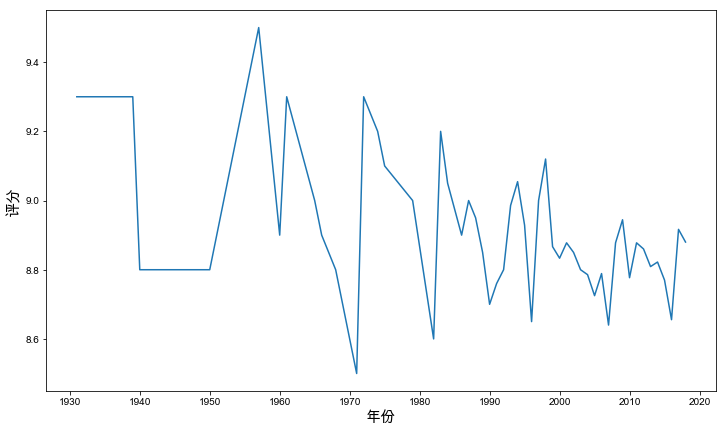

In [11]:
plt.figure(figsize=(12, 7))
ax = subplot(111)
xl=MultipleLocator(10)
ax.xaxis.set_major_locator(xl)

plt.xlabel('年份',fontsize=15)
plt.ylabel('评分',fontsize=15)

plt.plot(df1)

plt.savefig('/Users/super/Desktop/电影各年份平均分.png')

In [12]:
# 2，哪个国家的电影评分最高
df.head()

,name,score,year,country,type,year_new
0,肖申克的救赎,9.7,1994,美国,犯罪 剧情,1994
1,霸王别姬,9.6,1993,中国大陆 中国香港,剧情 爱情 同性,1993
2,阿甘正传,9.5,1994,美国,剧情 爱情,1994
3,这个杀手不太冷,9.4,1994,法国,剧情 动作 犯罪,1994
4,美丽人生,9.5,1997,意大利,剧情 喜剧 爱情 战争,1997


In [13]:
# 每个国家电影个数分布
df.groupby("country").size().reset_index().head(5)

,country,0
0,1964(中国大陆),1
1,中国台湾,2
2,中国台湾 中国大陆 美国 中国香港,1
3,中国台湾 日本,1
4,中国台湾 美国,2


In [14]:
# 查看错误数据
df[df["country"]=="1964(中国大陆)"]

,name,score,year,country,type,year_new
59,大闹天宫,9.3,1961(中国大陆),1964(中国大陆),1978(中国大陆),1961


In [15]:
df=df[df["country"]!="1964(中国大陆)"]
df.groupby("country").size().reset_index().head(2)

,country,0
0,中国台湾,2
1,中国台湾 中国大陆 美国 中国香港,1


In [16]:
# 清理一列中含有多个元素
df["country_new"]=df["country"].apply(lambda x:x.split(" "))
df["type_new"]=df["type"].apply(lambda x:x.split(" "))
df.reset_index(drop=True,inplace=True)
df.head()

,name,score,year,country,type,year_new,country_new,type_new
0,肖申克的救赎,9.7,1994,美国,犯罪 剧情,1994,[美国],"[犯罪, 剧情]"
1,霸王别姬,9.6,1993,中国大陆 中国香港,剧情 爱情 同性,1993,"[中国大陆, 中国香港]","[剧情, 爱情, 同性]"
2,阿甘正传,9.5,1994,美国,剧情 爱情,1994,[美国],"[剧情, 爱情]"
3,这个杀手不太冷,9.4,1994,法国,剧情 动作 犯罪,1994,[法国],"[剧情, 动作, 犯罪]"
4,美丽人生,9.5,1997,意大利,剧情 喜剧 爱情 战争,1997,[意大利],"[剧情, 喜剧, 爱情, 战争]"


In [17]:
# 示例数据
for i in range(df.shape[0]):
    for c in df.loc[i,"country_new"]:
        print(c)
        
    print("-"*20)
    if i >3:
        break

美国
--------------------
中国大陆
中国香港
--------------------
美国
--------------------
法国
--------------------
意大利
--------------------


In [18]:
# 统计所有国家都分数
df_country=pd.DataFrame()

count=0
for i in range(df.shape[0]):
    for c in df.loc[i,"country_new"]:
        df_country.loc[count,"country"]=c
        df_country.loc[count,"score"]=df.loc[i,"score"]
        count+=1
        
df_country.head(10)

,country,score
0,美国,9.7
1,中国大陆,9.6
2,中国香港,9.6
3,美国,9.5
4,法国,9.4
5,意大利,9.5
6,美国,9.4
7,日本,9.3
8,美国,9.5
9,美国,9.3


In [19]:
# 统计国家-评分数据
df_c=pd.DataFrame()
df_c["count"]=df_country.groupby("country").size()
df_c["score"]=df_country.groupby("country")["score"].mean()

df_c.reset_index(inplace=True)

df_c.sort_values("score",ascending=0,inplace=True)

df_c.head()

,country,count,score
5,冰岛,1,9.3
31,黎巴嫩,1,9.1
3,丹麦,1,9.1
29,阿联酋,1,9.1
23,瑞士,4,9.1


In [20]:
# 挑选拍摄电影超过5部的国家
df_c[df_c["count"]>4].reset_index(drop=True)

,country,count,score
0,意大利,9,9.066667
1,韩国,11,8.918182
2,日本,34,8.914706
3,法国,21,8.895238
4,加拿大,7,8.871429
5,中国大陆,20,8.865000
6,美国,139,8.862590
7,英国,33,8.839394
8,中国台湾,8,8.825000
9,德国,19,8.789474


In [21]:
# 4，高分电影的类型分布

df_type=pd.DataFrame()

count=0
for i in range(df.shape[0]):
    for c in df.loc[i,"type_new"]:
        df_type.loc[count,"type"]=c
        df_type.loc[count,"score"]=df.loc[i,"score"]
        count+=1
        
df_type.head(10)

,type,score
0,犯罪,9.7
1,剧情,9.7
2,剧情,9.6
3,爱情,9.6
4,同性,9.6
5,剧情,9.5
6,爱情,9.5
7,剧情,9.4
8,动作,9.4
9,犯罪,9.4


In [22]:
df_type.shape

(689, 2)

In [23]:
# 每一种类型电影的平均分数
df_type1=df_type.groupby("type")["score"].mean().reset_index().sort_values("score",ascending=0)
df_type1.head()

,type,score
23,纪录片,9.150000
6,历史,9.063636
17,歌舞,9.020000
26,音乐,9.000000
25,运动,9.000000


In [ ]:
# 每一种类型电影的个数
df_type2=df_type.groupby("type").size().reset_index()
df_type2.head()

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(df_type2["type"], df_type2[0], width=0.6)

plt.xlabel('type',fontsize=15)
plt.ylabel('count',fontsize=15)

plt.savefig('/Users/super/Desktop/电影类型.png')